In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import datetime as dt
import pylab as pl
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import statsmodels.formula.api as sm
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

#Import statsmodels package for training a linear regression model.
from patsy import dmatrices
import statsmodels.formula.api as sm
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

/Users/chenzeng/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:

df = pd.read_csv('w3withweather.csv')
df.set_index('LineID',inplace=True)
df.head()

/Users/chenzeng/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,timestamp,Direction,JourneyPatternID,TimeFrame,VehicleJourneyID,Opertator,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,StopID,AtStop,temp,hum,pres,rain
LineID,,,,,,,,,,,,,,,,,,,
66.0,0,2013-01-14 00:00:01,0,00660001,2013-01-13,14217,PO,0,-6.569710,53.380451,222,66006,40001,3968,0,3.317,91.0,1013.4,0.0
40.0,1,2013-01-14 00:00:01,0,040D0001,2013-01-13,14403,HN,0,-6.373083,53.410049,338,40204,38067,6005,0,3.317,91.0,1013.4,0.0
27.0,2,2013-01-14 00:00:01,0,077A1001,2013-01-13,14130,RD,0,-6.259118,53.345650,-534,27009,33254,1358,0,3.317,91.0,1013.4,0.0
39.0,3,2013-01-14 00:00:01,0,039A0001,2013-01-13,14729,PO,0,-6.274983,53.350784,-125,39015,33557,7160,0,3.317,91.0,1013.4,0.0
46.0,4,2013-01-14 00:00:01,0,046A0001,2013-01-13,16565,D1,0,-6.230600,53.317665,-988,46007,33532,2032,0,3.317,91.0,1013.4,0.0


In [3]:
df.loc[41].to_csv('41.csv', index=None)
df_dt = pd.read_csv('41.csv')
df_dt.head()

,Unnamed: 0,timestamp,Direction,JourneyPatternID,TimeFrame,VehicleJourneyID,Opertator,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,StopID,AtStop,temp,hum,pres,rain
0,12,2013-01-14 00:00:01,0,041C1001,2013-01-13,13146,SL,0,-6.263903,53.354855,-377,41005,40049,52,0,3.317,91.0,1013.4,0.0
1,28,2013-01-14 00:00:03,0,00411001,2013-01-13,13138,SL,0,-6.258044,53.348648,-216,41009,40050,277,0,3.317,91.0,1013.4,0.0
2,119,2013-01-14 00:00:13,0,041C0001,2013-01-13,13158,SL,0,-6.244040,53.453304,-48,41004,33635,3707,0,3.317,91.0,1013.4,0.0
3,122,2013-01-14 00:00:16,0,041B0002,2013-01-13,13075,SL,0,-6.225200,53.449665,-684,41001,33228,7135,0,3.317,91.0,1013.4,0.0
4,125,2013-01-14 00:00:22,0,041C1001,2013-01-13,13146,SL,0,-6.261737,53.352970,-408,41005,40049,52,0,3.317,91.0,1013.4,0.0


In [4]:
#delete the constant columns
#drop the constant numberic columns
num_columns = df_dt.select_dtypes(['int64','float64']).columns
num_columns
for column in num_columns:
    if len(df_dt[column].unique()) == 1:
        df_dt.drop([column], 1, inplace=True)
df_dt.head()

,Unnamed: 0,timestamp,JourneyPatternID,TimeFrame,VehicleJourneyID,Opertator,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,StopID,AtStop,temp,hum,pres,rain
0,12,2013-01-14 00:00:01,041C1001,2013-01-13,13146,SL,0,-6.263903,53.354855,-377,41005,40049,52,0,3.317,91.0,1013.4,0.0
1,28,2013-01-14 00:00:03,00411001,2013-01-13,13138,SL,0,-6.258044,53.348648,-216,41009,40050,277,0,3.317,91.0,1013.4,0.0
2,119,2013-01-14 00:00:13,041C0001,2013-01-13,13158,SL,0,-6.244040,53.453304,-48,41004,33635,3707,0,3.317,91.0,1013.4,0.0
3,122,2013-01-14 00:00:16,041B0002,2013-01-13,13075,SL,0,-6.225200,53.449665,-684,41001,33228,7135,0,3.317,91.0,1013.4,0.0
4,125,2013-01-14 00:00:22,041C1001,2013-01-13,13146,SL,0,-6.261737,53.352970,-408,41005,40049,52,0,3.317,91.0,1013.4,0.0


In [5]:
df_dt.drop(['Unnamed: 0','Opertator', 'TimeFrame'],axis=1).to_csv('one.csv',index=None)

df = pd.read_csv('one.csv')
df.head()

,timestamp,JourneyPatternID,VehicleJourneyID,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,StopID,AtStop,temp,hum,pres,rain
0,2013-01-14 00:00:01,041C1001,13146,0,-6.263903,53.354855,-377,41005,40049,52,0,3.317,91.0,1013.4,0.0
1,2013-01-14 00:00:03,00411001,13138,0,-6.258044,53.348648,-216,41009,40050,277,0,3.317,91.0,1013.4,0.0
2,2013-01-14 00:00:13,041C0001,13158,0,-6.244040,53.453304,-48,41004,33635,3707,0,3.317,91.0,1013.4,0.0
3,2013-01-14 00:00:16,041B0002,13075,0,-6.225200,53.449665,-684,41001,33228,7135,0,3.317,91.0,1013.4,0.0
4,2013-01-14 00:00:22,041C1001,13146,0,-6.261737,53.352970,-408,41005,40049,52,0,3.317,91.0,1013.4,0.0


In [6]:
df.shape

(324432, 15)

In [7]:
df.dtypes

timestamp            object
JourneyPatternID     object
VehicleJourneyID      int64
Congestion            int64
LonWGS84            float64
LatWGS84            float64
Delay                 int64
BlockID               int64
VehicleID             int64
StopID               object
AtStop                int64
temp                float64
hum                 float64
pres                float64
rain                float64
dtype: object

In [8]:
df.describe()

,VehicleJourneyID,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,AtStop,temp,hum,pres,rain
count,324432.000000,324432.000000,324432.000000,324432.000000,324432.000000,324432.000000,324432.000000,324432.000000,324432.000000,324432.000000,324432.000000,324432.000000
mean,13563.651341,0.003841,-6.244349,53.410246,4.122121,195532.087538,33951.049739,0.220256,3.529955,84.842621,999.637179,0.201076
std,102948.060256,0.061853,0.015441,0.045034,372.193484,310173.379086,1893.027864,0.414420,1.908104,6.800476,7.716184,0.422774
min,4.000000,0.000000,-6.327800,53.276932,-4264.000000,41001.000000,33057.000000,0.000000,-0.784000,60.230000,984.790000,0.000000
25%,76.000000,0.000000,-6.255460,53.364475,-137.000000,41005.000000,33269.000000,0.000000,2.311000,81.300000,993.440000,0.000000
50%,147.000000,0.000000,-6.245545,53.417068,0.000000,41010.000000,33428.000000,0.000000,3.083000,87.400000,1003.000000,0.000000
75%,3786.000000,0.000000,-6.233233,53.457085,124.000000,41017.000000,33629.000000,0.000000,4.438000,89.500000,1005.700000,0.200000
max,997369.000000,1.000000,-6.116313,53.574326,31362.000000,835002.000000,43055.000000,1.000000,8.770000,93.700000,1013.400000,2.200000


In [9]:
df['Congestion'] = df['Congestion'].astype('category')
df['BlockID'] = df['BlockID'].astype('category')
df['VehicleID'] = df['VehicleID'] .astype('category')
df['AtStop'] = df['AtStop'].astype('category')
df['VehicleJourneyID'] = df['VehicleJourneyID'].astype('category')
#df['LonWGS84'] = df['LonWGS84'].astype('category')
#df['LatWGS84'] = df['LatWGS84'].astype('category')

object_columns = df.select_dtypes(['object']).columns
for column in object_columns:
    df[column] = df[column].astype('category')
df.dtypes

timestamp           category
JourneyPatternID    category
VehicleJourneyID    category
Congestion          category
LonWGS84             float64
LatWGS84             float64
Delay                  int64
BlockID             category
VehicleID           category
StopID              category
AtStop              category
temp                 float64
hum                  float64
pres                 float64
rain                 float64
dtype: object

In [10]:
df.select_dtypes(['category']).describe().T 

,count,unique,top,freq
timestamp,324432,124324,2013-01-16 08:19:14,27
JourneyPatternID,324428,22,00411001,64089
VehicleJourneyID,324432,788,159,2727
Congestion,324432,2,0,323186
BlockID,324432,54,41008,19202
VehicleID,324432,130,33450,11871
StopID,324432,195,4843,26480
AtStop,324432,2,0,252974


In [11]:
#delete the journeypatternID&stopID is equal to null value

import csv

inpu = open('one.csv', 'r')
output = open('new.csv', 'w')
writer = csv.writer(output)
for row in csv.reader(inpu):
    if row[1]!="null" and row[1]!="" :
        writer.writerow(row)
inpu.close()
output.close()

In [12]:
#delete the time between 1:00 and 5:00 for route 41
df = pd.read_csv('new.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y-%m-%d %H:%M:%S")
time = df['timestamp']
ne =[]
for i in time:
    h=i.hour
    ne.append(h)
t = pd.DataFrame({'time': ne})

df_dt = pd.concat([t.time,df],axis=1)
df_dt.to_csv('neww3.csv',index=None)

In [13]:
#delete the time between 1:00 and 5:00 for route 41
import csv

inpu = open('neww3.csv', 'r')
output = open('clean41.csv', 'w')
writer = csv.writer(output)
for row in csv.reader(inpu):
    if row[0] !="0" and  row[0] !="1" and row[0] !="2" and row[0] !="3" and row[0] !="4" and row[0] !="5":
        writer.writerow(row)
inpu.close()
output.close()

In [14]:
df = pd.read_csv('clean41.csv')
df.head()
df.loc[(df['Delay'] > -1200) & (df['Delay'] <= 1200)].to_csv('new_clean.csv',index=None)
df = pd.read_csv('new_clean.csv')
df.head()

,time,timestamp,JourneyPatternID,VehicleJourneyID,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,StopID,AtStop,temp,hum,pres,rain
0,6,2013-01-14 06:00:02,00411001,4,0,-6.250404,53.459583,0,41001,33637,4843,1,4.616,90.3,1008.5,0.0
1,6,2013-01-14 06:00:14,00410001,7,0,-6.223248,53.459564,-799,41002,33422,3679,0,4.616,90.3,1008.5,0.0
2,6,2013-01-14 06:00:22,00411001,4,0,-6.248335,53.459911,0,41001,33637,4843,0,4.616,90.3,1008.5,0.0
3,6,2013-01-14 06:00:35,00410001,7,0,-6.224726,53.460163,-799,41002,33422,5075,0,4.616,90.3,1008.5,0.0
4,6,2013-01-14 06:00:43,00411001,4,0,-6.250257,53.459606,39,41001,33637,4843,0,4.616,90.3,1008.5,0.0


In [15]:
# find the 5 higest listingprice
df.drop(['VehicleID','BlockID','VehicleJourneyID','LonWGS84','LatWGS84','Congestion'],axis=1).to_csv('clean.csv',index=None)
df = pd.read_csv('clean.csv')
df.sort_values(by='Delay', axis=0, ascending=False, inplace=False,kind='quicksort',na_position='last').head(15)

,time,timestamp,JourneyPatternID,Delay,StopID,AtStop,temp,hum,pres,rain
10290,9,2013-01-14 09:55:06,00411001,1200,277,0,4.148,89.5,1008.70,0.0
94041,8,2013-01-16 08:48:32,00411002,1200,51,1,4.066,78.5,1002.90,0.0
49319,8,2013-01-15 08:32:27,041X1002,1200,333,0,0.267,88.9,1008.10,0.0
49296,8,2013-01-15 08:32:08,041X1002,1200,333,0,0.267,88.9,1008.10,0.0
48576,8,2013-01-15 08:21:30,041X1002,1200,6311,0,0.198,89.5,1008.10,0.0
178458,8,2013-01-18 08:36:53,041X1002,1199,6311,0,1.868,90.1,988.96,2.2
94025,8,2013-01-16 08:48:25,041X1003,1199,760,0,4.066,78.5,1002.90,0.0
8534,9,2013-01-14 09:06:46,00411002,1199,277,0,4.285,88.3,1008.80,0.1
93043,8,2013-01-16 08:31:47,041X1003,1198,401,1,3.913,78.7,1002.80,0.0
137926,9,2013-01-17 09:27:42,00411001,1198,214,0,4.847,93.3,1004.50,0.0


 # Data Understanding: data quality plan

## Irregular cardinality

In [16]:
# Check for irregular cardinality in categorical features.
df.select_dtypes(['category']).columns
print("Unique values for:\n- JourneyPatternID:", pd.unique(df.JourneyPatternID.ravel()))
#print("\n- VehicleJourneyID:", sorted(pd.unique(df.VehicleJourneyID.ravel())))
#print("\n- Congestion:", pd.unique(df.Congestion.ravel()))
#print("\n- BlockID:", pd.unique(df.BlockID.ravel()))
#print("\n- VehicleID:", pd.unique(df.VehicleID.ravel()))
print("\n- StopID:", pd.unique(df.StopID.ravel()))
print("\n- AtStop:", pd.unique(df.AtStop.ravel()))

Unique values for:
- JourneyPatternID: ['00411001' '00410001' '041C1002' '041B0001' '041C0001' '041C1001'
 '041A1001' '00411002' '041X1003' '00410005' '041B1002' '041X1002'
 '00410003' '041X1001' '00410006' '041B0002' '00411004' '041X0002'
 '00411003' '041X0001' '00410007']

- StopID: [4843 3679 5075 4905 3682 3864 4906 3865 1172 4910 4907 4912 4909 4913 4914
 4915 1173 3884 4957 1174 3686 1175 5077   15 3689   17   19 3690   21 6117
   85  203  204 5079  205 3704 3694 3695 3705 1620  220  733 3696 3697 1622
 6015 1623 3699 1624 5029 1625 5028 1626 3885 3088 1627 3663 1629 1630 7347
 3669 3698 7348 7349 3671 1632 3672 5053  288 1633 4908 3674 1635 1634 3675
 1636 3676 1637 5073 1638 5074 6054 4330 1639 1171 1640  231 1641 1642  213
  214   18 4432  119   44   45   46 1631   47   48   51   49   52   50 4921
  277 4922 4923 4924 4958 3751 3691 3572 3701 3702 5076 3670 7133 7134 3867
 7135 5030 5031 3089 7136 3090 3707 3874 3708 3710 4925 4926 3678 1628 3711
 3712 4916 4917 4918 4919 4920

In [17]:
df.isnull().sum()

time                0
timestamp           0
JourneyPatternID    0
Delay               0
StopID              0
AtStop              0
temp                0
hum                 0
pres                0
rain                0
dtype: int64

## Outlier

# Exploring relationship between feature pairs

##  plots between continous and categorical features with  target feature

### Dealy with DateTime

In [18]:
df[['Delay','temp','pres','rain','hum']].corr()

,Delay,temp,pres,rain,hum
Delay,1.000000,-0.097140,-0.075549,0.036053,-0.069976
temp,-0.097140,1.000000,0.179575,-0.157310,-0.033147
pres,-0.075549,0.179575,1.000000,-0.482495,0.109390
rain,0.036053,-0.157310,-0.482495,1.000000,0.273542
hum,-0.069976,-0.033147,0.109390,0.273542,1.000000


According to the above table, it can be seen that longitude and latitude both do not have relationship with delay.

In [19]:

aggregations = {
    'Delay':"sum"
}
group = df.groupby(df['timestamp'])['Delay'].agg(aggregations)
group

,Delay
timestamp,
2013-01-14 06:00:02,0
2013-01-14 06:00:14,-799
2013-01-14 06:00:22,0
2013-01-14 06:00:35,-799
2013-01-14 06:00:43,39
2013-01-14 06:00:55,-799
2013-01-14 06:01:03,4
2013-01-14 06:01:13,-834
2013-01-14 06:01:22,4


In [20]:
#df.groupby([df['DateTime'],pd.TimeGrouper(freq='30Min')])

In [21]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y-%m-%d %H:%M:%S")
df1 = df.set_index("timestamp")
df1.resample("30Min").mean().to_csv('2.csv')
clean_df = pd.read_csv('2.csv')
clean_df

,timestamp,time,Delay,StopID,AtStop,temp,hum,pres,rain
0,2013-01-14 06:00:00,6.0,-124.591837,3611.505102,0.387755,4.593321,90.209439,1008.552041,0.000000
1,2013-01-14 06:30:00,6.0,-111.869871,2518.111372,0.261430,4.663899,90.114771,1008.552755,0.000000
2,2013-01-14 07:00:00,7.0,-51.564084,2338.735699,0.303403,4.675831,89.489573,1008.500000,0.000000
3,2013-01-14 07:30:00,7.0,112.683690,2365.222954,0.303679,4.392365,89.300000,1008.593795,0.000000
4,2013-01-14 08:00:00,8.0,134.393585,2667.653768,0.232179,4.106110,89.603106,1008.851222,0.017159
5,2013-01-14 08:30:00,8.0,267.138614,2381.306381,0.221672,4.201667,89.188724,1008.852145,0.100000
6,2013-01-14 09:00:00,9.0,174.311641,2521.208983,0.266728,4.215107,88.523831,1008.780477,0.080477
7,2013-01-14 09:30:00,9.0,-58.135364,2604.537225,0.248731,4.033029,89.011421,1008.700000,0.000000
8,2013-01-14 10:00:00,10.0,-190.136664,2713.543827,0.319510,4.426549,88.783695,1008.686711,0.000000
9,2013-01-14 10:30:00,10.0,-107.260430,2440.370417,0.235145,4.877054,86.539444,1008.532491,0.000000


In [22]:
clean_df['timestamp'] = pd.to_datetime(clean_df['timestamp'], format="%Y-%m-%d %H:%M:%S")
clean_df['date'] = [d.date() for d in clean_df['timestamp']]
clean_df['time'] = [d.time() for d in clean_df['timestamp']]
clean_df['date'] = pd.to_datetime(clean_df['date'])
clean_df['weekday'] = clean_df['date'].dt.weekday_name

clean_df

,timestamp,time,Delay,StopID,AtStop,temp,hum,pres,rain,date,weekday
0,2013-01-14 06:00:00,06:00:00,-124.591837,3611.505102,0.387755,4.593321,90.209439,1008.552041,0.000000,2013-01-14,Monday
1,2013-01-14 06:30:00,06:30:00,-111.869871,2518.111372,0.261430,4.663899,90.114771,1008.552755,0.000000,2013-01-14,Monday
2,2013-01-14 07:00:00,07:00:00,-51.564084,2338.735699,0.303403,4.675831,89.489573,1008.500000,0.000000,2013-01-14,Monday
3,2013-01-14 07:30:00,07:30:00,112.683690,2365.222954,0.303679,4.392365,89.300000,1008.593795,0.000000,2013-01-14,Monday
4,2013-01-14 08:00:00,08:00:00,134.393585,2667.653768,0.232179,4.106110,89.603106,1008.851222,0.017159,2013-01-14,Monday
5,2013-01-14 08:30:00,08:30:00,267.138614,2381.306381,0.221672,4.201667,89.188724,1008.852145,0.100000,2013-01-14,Monday
6,2013-01-14 09:00:00,09:00:00,174.311641,2521.208983,0.266728,4.215107,88.523831,1008.780477,0.080477,2013-01-14,Monday
7,2013-01-14 09:30:00,09:30:00,-58.135364,2604.537225,0.248731,4.033029,89.011421,1008.700000,0.000000,2013-01-14,Monday
8,2013-01-14 10:00:00,10:00:00,-190.136664,2713.543827,0.319510,4.426549,88.783695,1008.686711,0.000000,2013-01-14,Monday
9,2013-01-14 10:30:00,10:30:00,-107.260430,2440.370417,0.235145,4.877054,86.539444,1008.532491,0.000000,2013-01-14,Monday


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

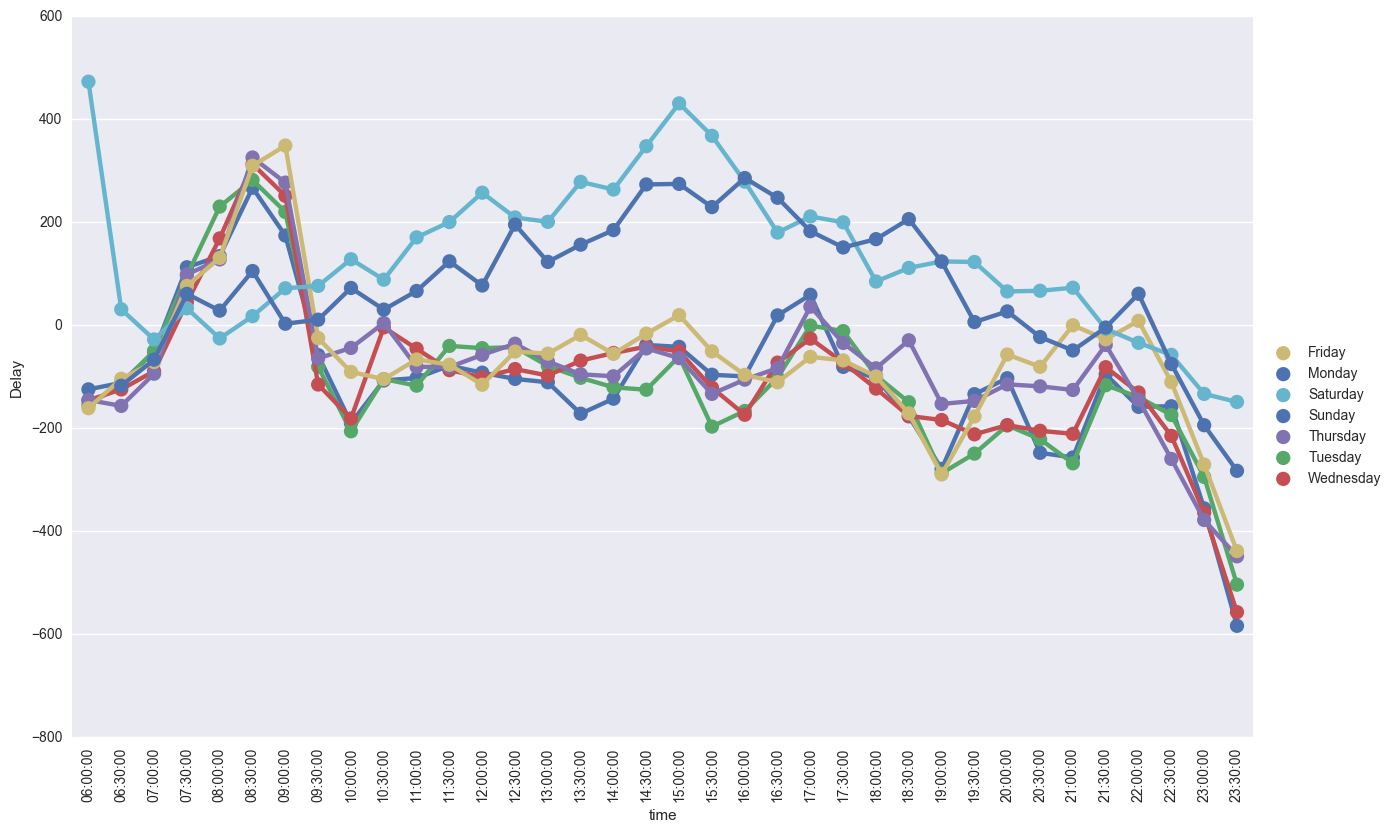

In [23]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(clean_df,  size=8, aspect=1.6)
grid.map(sns.pointplot, 'time', 'Delay','weekday', palette='deep')
grid.add_legend()
pl.xticks(rotation = 90)

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

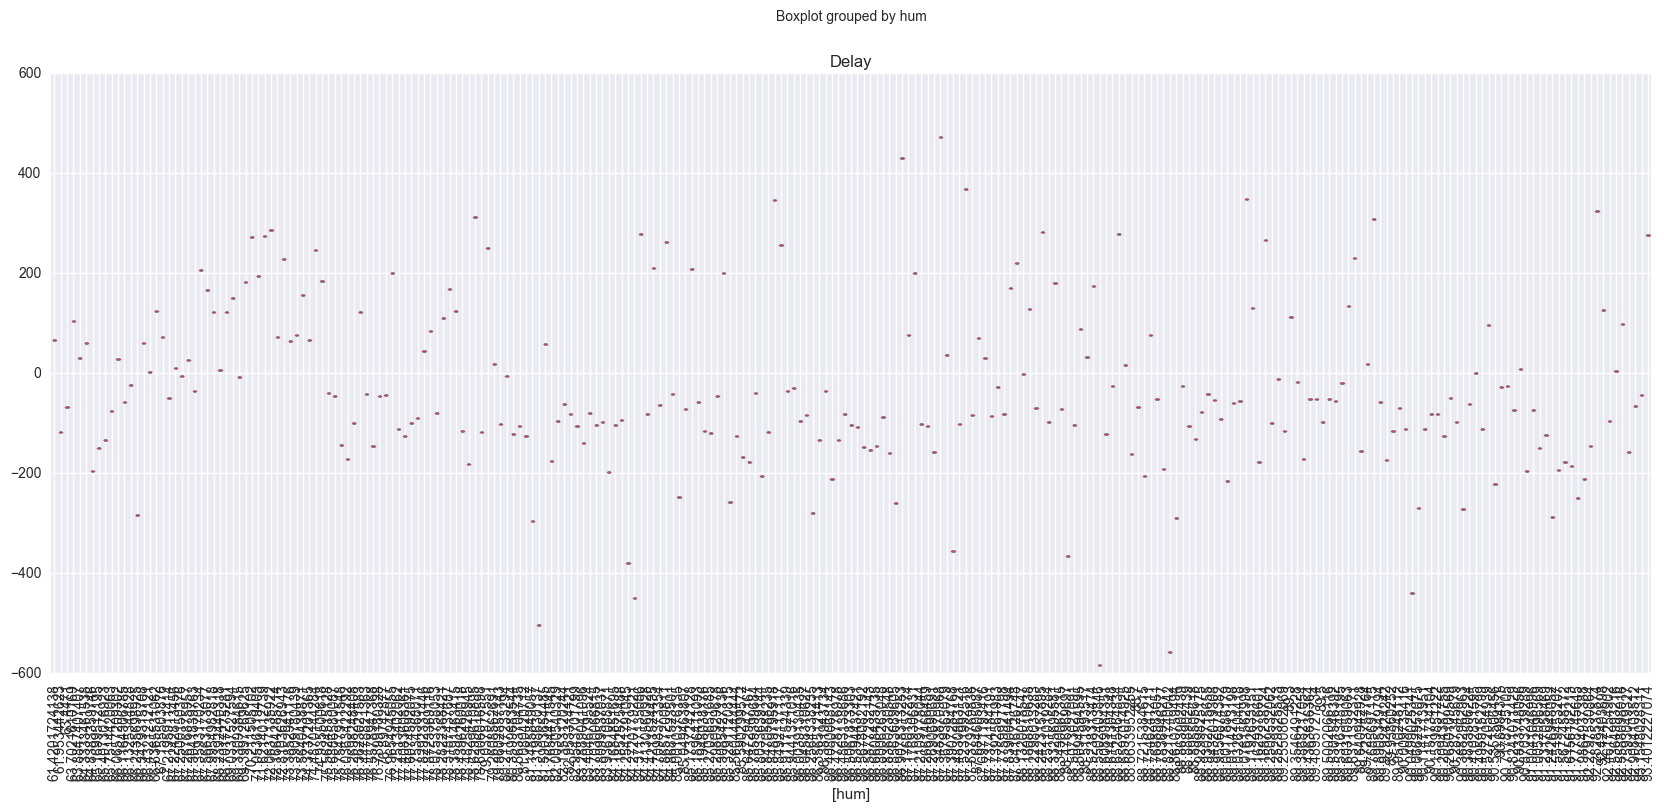

In [24]:
plt.figure()

flierprops = dict(marker='o', markerfacecolor='green', markersize=6, 
                  linestyle='none')
bp = clean_df.boxplot(column=['Delay'], by=['hum'],flierprops=flierprops,figsize=(20,8))
pl.xticks(rotation = 90)


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
        86, 87, 88, 89, 90]), <a list of 90 Text xticklabel objects>)

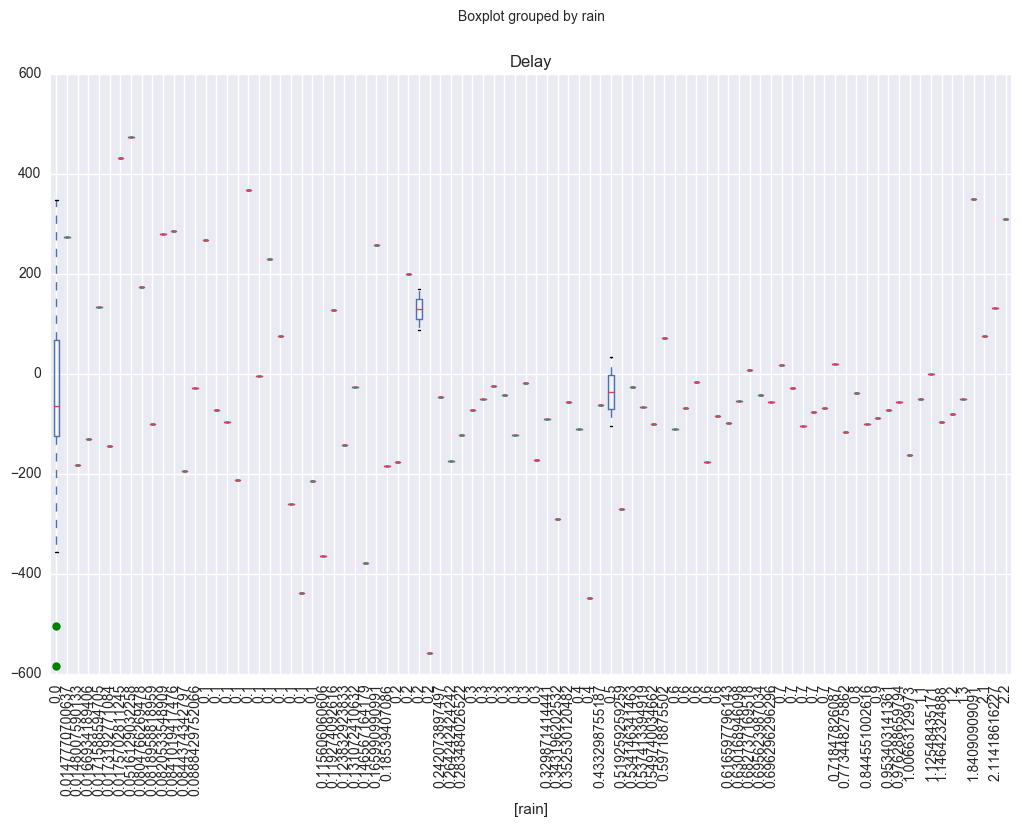

In [25]:
plt.figure()

flierprops = dict(marker='o', markerfacecolor='green', markersize=6, 
                  linestyle='none')
bp = clean_df.boxplot(column=['Delay'], by=['rain'],flierprops=flierprops,figsize=(12,8))
pl.xticks(rotation = 90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 48 Text xticklabel objects>)

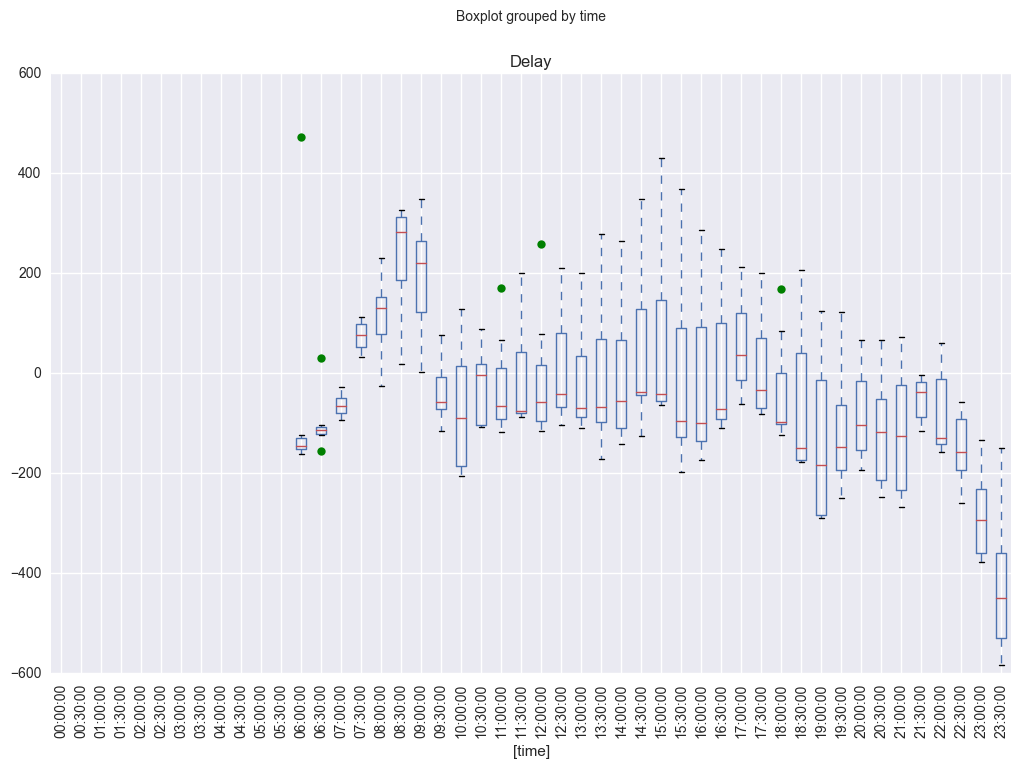

In [26]:
plt.figure()

flierprops = dict(marker='o', markerfacecolor='green', markersize=6, 
                  linestyle='none')
bp = clean_df.boxplot(column=['Delay'], by=['time'],flierprops=flierprops,figsize=(12,8))
pl.xticks(rotation = 90)



(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text xticklabel objects>)

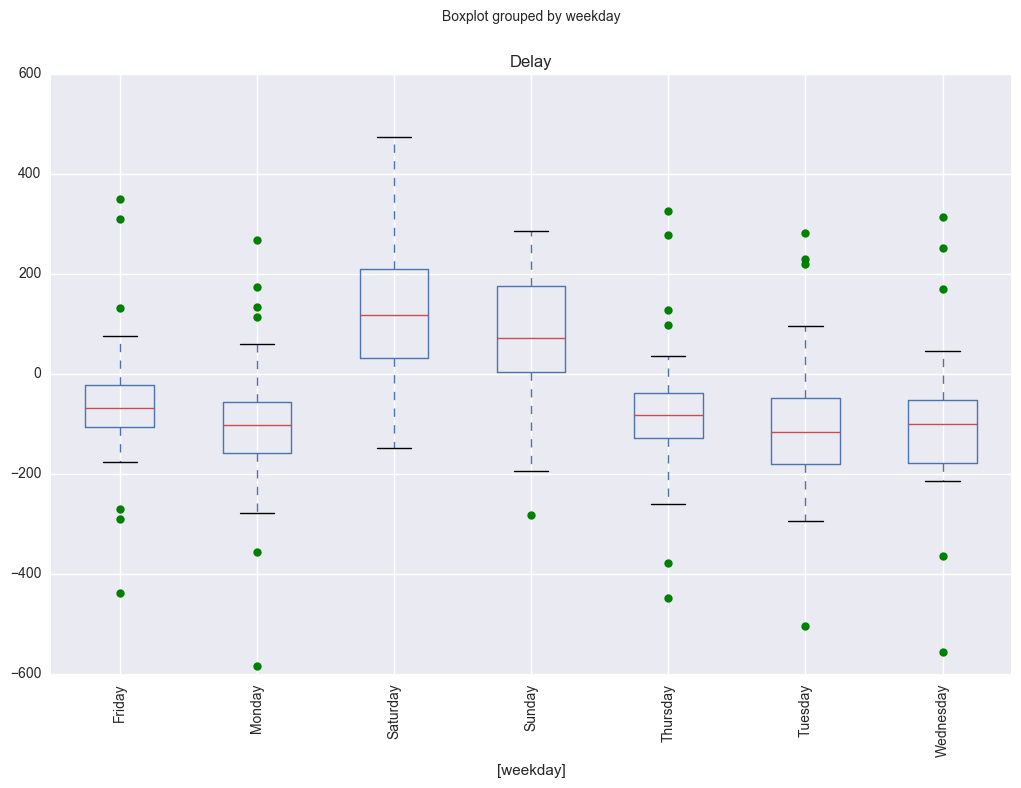

In [27]:
plt.figure()

flierprops = dict(marker='o', markerfacecolor='green', markersize=6, 
                  linestyle='none')
bp = clean_df.boxplot(column=['Delay'], by=['weekday'],flierprops=flierprops,figsize=(12,8))
pl.xticks(rotation = 90)

In [28]:
#g = df.groupby(['JourneyPatternID'])
#g['VehicleID'].unique()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21]), <a list of 21 Text xticklabel objects>)

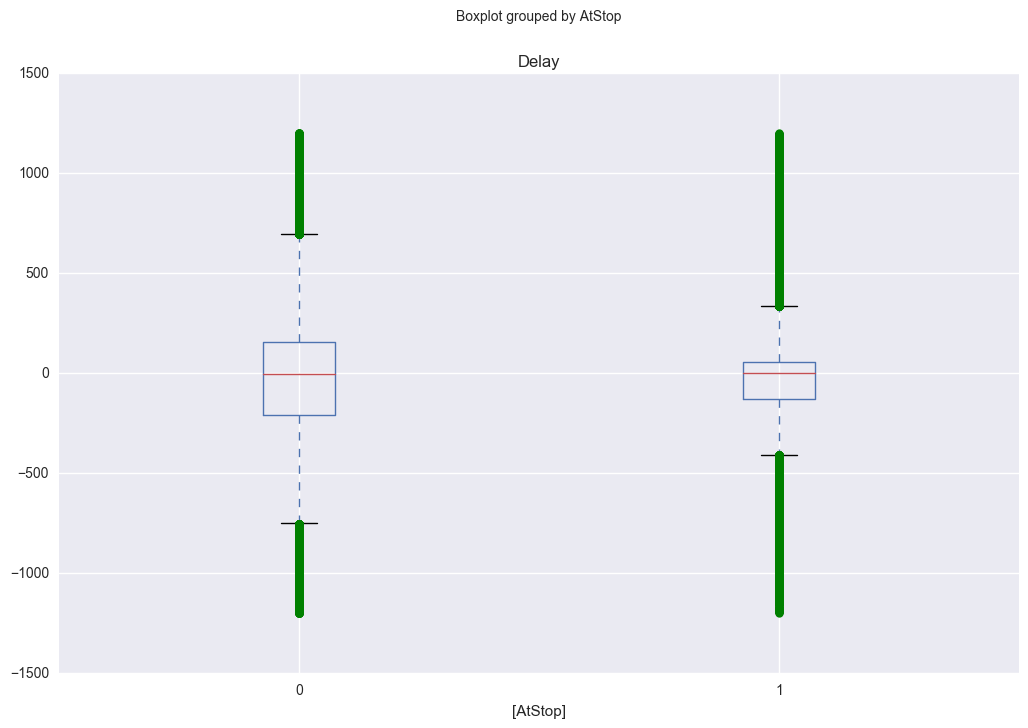

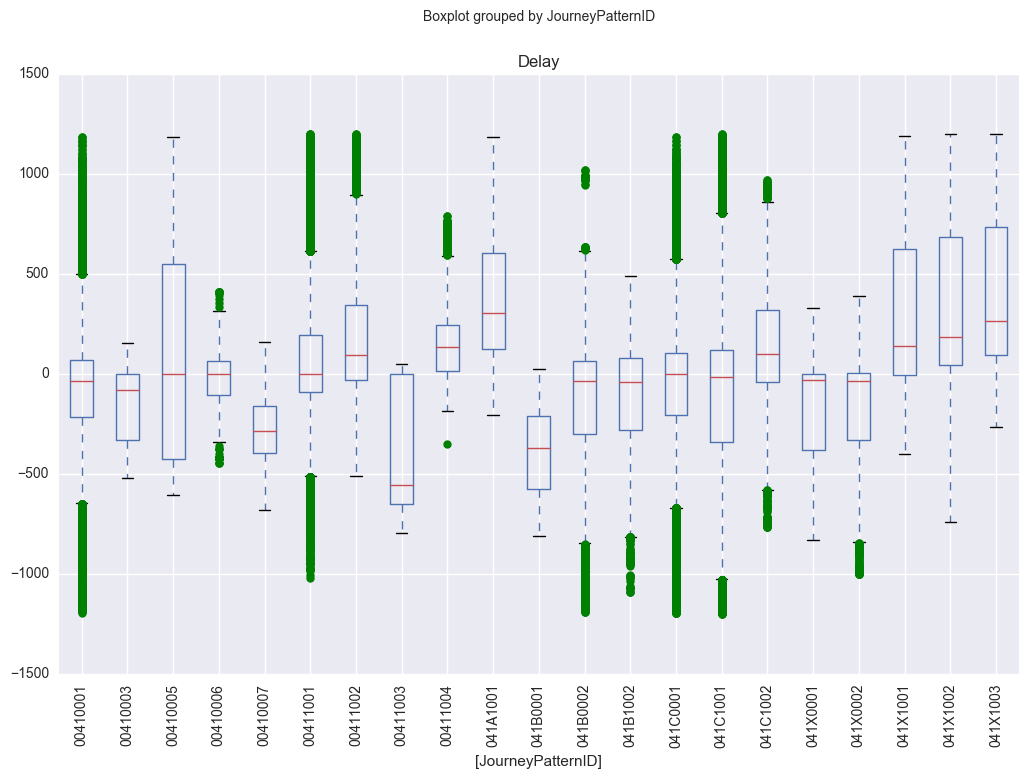

In [29]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
bp = df.boxplot(column=['Delay'], by=['AtStop'], flierprops=flierprops, figsize=(12,8))
bp = df.boxplot(column=['Delay'], by=['JourneyPatternID'], flierprops=flierprops, figsize=(12,8))
pl.xticks(rotation = 90)



### According to the above graphs and the table, there are some outliers that are the same data. we can delete those data from original data.

In [30]:
#caculating the two stops time
df.head()

,time,timestamp,JourneyPatternID,Delay,StopID,AtStop,temp,hum,pres,rain
0,6,2013-01-14 06:00:02,00411001,0,4843,1,4.616,90.3,1008.5,0.0
1,6,2013-01-14 06:00:14,00410001,-799,3679,0,4.616,90.3,1008.5,0.0
2,6,2013-01-14 06:00:22,00411001,0,4843,0,4.616,90.3,1008.5,0.0
3,6,2013-01-14 06:00:35,00410001,-799,5075,0,4.616,90.3,1008.5,0.0
4,6,2013-01-14 06:00:43,00411001,39,4843,0,4.616,90.3,1008.5,0.0


# Data Preparation

## Normalization

In [31]:
df

,time,timestamp,JourneyPatternID,Delay,StopID,AtStop,temp,hum,pres,rain
0,6,2013-01-14 06:00:02,00411001,0,4843,1,4.616,90.30,1008.50,0.0
1,6,2013-01-14 06:00:14,00410001,-799,3679,0,4.616,90.30,1008.50,0.0
2,6,2013-01-14 06:00:22,00411001,0,4843,0,4.616,90.30,1008.50,0.0
3,6,2013-01-14 06:00:35,00410001,-799,5075,0,4.616,90.30,1008.50,0.0
4,6,2013-01-14 06:00:43,00411001,39,4843,0,4.616,90.30,1008.50,0.0
5,6,2013-01-14 06:00:55,00410001,-799,5075,0,4.616,90.30,1008.50,0.0
6,6,2013-01-14 06:01:03,00411001,4,4905,0,4.616,90.30,1008.50,0.0
7,6,2013-01-14 06:01:13,00410001,-834,3682,0,4.616,90.30,1008.50,0.0
8,6,2013-01-14 06:01:22,00411001,4,4905,0,4.616,90.30,1008.50,0.0
9,6,2013-01-14 06:01:34,00410001,-851,3864,0,4.616,90.30,1008.50,0.0


In [32]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y-%m-%d %H:%M:%S")
df['date'] = [d.date() for d in df['timestamp']]
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.weekday

df

,time,timestamp,JourneyPatternID,Delay,StopID,AtStop,temp,hum,pres,rain,date,day
0,6,2013-01-14 06:00:02,00411001,0,4843,1,4.616,90.30,1008.50,0.0,2013-01-14,0
1,6,2013-01-14 06:00:14,00410001,-799,3679,0,4.616,90.30,1008.50,0.0,2013-01-14,0
2,6,2013-01-14 06:00:22,00411001,0,4843,0,4.616,90.30,1008.50,0.0,2013-01-14,0
3,6,2013-01-14 06:00:35,00410001,-799,5075,0,4.616,90.30,1008.50,0.0,2013-01-14,0
4,6,2013-01-14 06:00:43,00411001,39,4843,0,4.616,90.30,1008.50,0.0,2013-01-14,0
5,6,2013-01-14 06:00:55,00410001,-799,5075,0,4.616,90.30,1008.50,0.0,2013-01-14,0
6,6,2013-01-14 06:01:03,00411001,4,4905,0,4.616,90.30,1008.50,0.0,2013-01-14,0
7,6,2013-01-14 06:01:13,00410001,-834,3682,0,4.616,90.30,1008.50,0.0,2013-01-14,0
8,6,2013-01-14 06:01:22,00411001,4,4905,0,4.616,90.30,1008.50,0.0,2013-01-14,0
9,6,2013-01-14 06:01:34,00410001,-851,3864,0,4.616,90.30,1008.50,0.0,2013-01-14,0


In [33]:
d = df['JourneyPatternID']
new =[]
for i in d:
    new.append(i[4])
a = pd.DataFrame({'JourneyID': new})
a.head()

,JourneyID
0,1
1,0
2,1
3,0
4,1


In [34]:
#Only keep numeric columns
df_cont = df[['StopID']]
#Range normalise all columns
df_norm = (df_cont - df_cont.min()) / (df_cont.max() - df_cont.min())
df_norm

,StopID
0,0.658304
1,0.499591
2,0.658304
3,0.689937
4,0.658304
5,0.689937
6,0.666758
7,0.500000
8,0.666758
9,0.524816


In [35]:
df_new = pd.concat([a.JourneyID,df_norm,df.time, df.temp,df.hum,df.pres,df.rain,df.day,df.Delay],axis=1)
df_new

,JourneyID,StopID,time,temp,hum,pres,rain,day,Delay
0,1,0.658304,6,4.616,90.30,1008.50,0.0,0,0
1,0,0.499591,6,4.616,90.30,1008.50,0.0,0,-799
2,1,0.658304,6,4.616,90.30,1008.50,0.0,0,0
3,0,0.689937,6,4.616,90.30,1008.50,0.0,0,-799
4,1,0.658304,6,4.616,90.30,1008.50,0.0,0,39
5,0,0.689937,6,4.616,90.30,1008.50,0.0,0,-799
6,1,0.666758,6,4.616,90.30,1008.50,0.0,0,4
7,0,0.500000,6,4.616,90.30,1008.50,0.0,0,-834
8,1,0.666758,6,4.616,90.30,1008.50,0.0,0,4
9,0,0.524816,6,4.616,90.30,1008.50,0.0,0,-851


# Random Forest

In [36]:
#Select the train set data
X=df_new[df_new[['JourneyID','time','StopID','day','rain','temp','hum','pres']].columns]
y=df_new[df_new[['Delay']].columns]
# Instantiate estimator, fit with training set
# Train a classification tree
rfc = RandomForestRegressor(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfc.fit(X, y)
print(rfc)

/Users/chenzeng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)


In [37]:
# Compute the importance of each feature based on the trained decision tree classifier
pd.DataFrame({'feature': X.columns, 'importance': rfc.feature_importances_})

,feature,importance
0,JourneyID,0.081775
1,time,0.195090
2,StopID,0.302290
3,day,0.065230
4,rain,0.015648
5,temp,0.132311
6,hum,0.105832
7,pres,0.101824


According to the above table, it can be seen that the most important feature is StopID. the three least important features are AtStop, Congestion and JourneyID.

In [38]:
#Select the train set data
X=df_new[df_new[['time','JourneyID','StopID','temp','hum','pres']].columns]
y=df_new[df_new[['Delay']].columns]
# Instantiate estimator, fit with training set
# Train a classification tree
rfc = RandomForestRegressor(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfc.fit(X, y)
print(rfc)

/Users/chenzeng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)


In [39]:
rfc.predict(X)

array([   13.56371429,  -772.255     ,    13.56371429, ...,   -89.50333333,
       -1005.        ,   244.23933333])

In [40]:
df_predict=pd.DataFrame({'Actual':df_new.Delay, 'Predict':rfc.predict(X)})
df_predict

,Actual,Predict
0,0,13.563714
1,-799,-772.255000
2,0,13.563714
3,-799,-787.185833
4,39,13.563714
5,-799,-787.185833
6,4,4.230000
7,-834,-826.280000
8,4,4.230000
9,-851,-843.890000


In [41]:
#df_new.Delay.mean()

In [42]:
#DelayClass = (df_new.Delay > -63.72682207004681) * 1.0

#df_DelayClass = pd.DataFrame({'DelayClass': DelayClass})
#df_DelayClass

In [43]:
#print("Accuracy: ", metrics.accuracy_score(y, df_predict.Predict))
#print("Confusion matrix: \n", metrics.confusion_matrix(y, df_predict.Predict))
#print("Classification report:\n ", metrics.classification_report(y, df_predict.Predict))

In [44]:
import numpy as np
rmse = np.sqrt(((df_new.Delay - rfc.predict(X))** 2).mean())
print("\nRoot Mean Squared Error:\n", rmse)


Root Mean Squared Error:
 142.012977982


In [45]:
# Print the Mean Squared Error of the model on the training set
mse = ((df_new.Delay - rfc.predict(X))** 2).mean()
print("\nMean Squared Error:\n", mse)


Mean Squared Error:
 20167.68591540142


In [46]:
# Print the Mean Absolute Error of the model on the training set
mae = abs(df_new.Delay - rfc.predict(X)).mean()
print("\nMean Absolute Error:\n", mae)


Mean Absolute Error:
 71.65984961562155


#  Evaluate on hold-out data

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [52]:
rfc.fit(X_train, y_train)
print("Training data:\n", pd.concat([X_train, y_train], axis=1))
print("\nTest data:\n", pd.concat([X_test, y_test], axis=1))

/Users/chenzeng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Training data:
         time JourneyID    StopID   temp    hum     pres  Delay
186812    12         0  0.037224  2.344  89.20   986.65     73
165650    19         0  0.499455  7.130  86.30   997.85      0
40524     22         0  0.673848  1.427  87.00  1007.00   -383
63100     14         0  0.218844  3.221  80.00  1006.10    -47
19537     14         0  0.037224  5.418  74.10  1006.80      0
229006    15         0  0.220207  2.096  86.70   995.21    404
4136       7         0  0.025907  4.288  89.30  1008.80   -152
35304     19         1  0.035724  1.801  86.30  1006.80   -897
53053      9         1  0.035724  0.590  87.60  1007.50    546
165031    19         0  0.009545  6.997  86.80   998.06    -73
172878     7         1  0.658304  2.410  88.10   989.98    -13
5110       8         1  0.858467  4.127  89.50  1008.80    137
24355     15         1  0.658304  4.005  82.60  1006.70      0
166781    20         1  0.527679  7.370  84.80   997.60   -160
146763    13         0  0.158031  8.050

In [53]:
predictions_test = rfc.predict(X_test)
df_true_vs_predicted_test = pd.DataFrame({'Actual': y_test.Delay, 'Predicted': predictions_test})

df_true_vs_predicted_test

,Actual,Predicted
33630,62,278.309032
254079,643,717.395167
252191,184,166.347333
41750,-1187,-531.460635
117831,-84,-292.961011
263895,261,276.094929
134638,-265,349.602952
143393,216,193.356333
186734,-110,-76.871013
66294,312,358.860467


In [54]:
# Print the Mean Squared Error of the model on the training set
mse = ((y_test.Delay - rfc.predict(X_test))** 2).mean()
print("\nMean Squared Error:\n", mse)


Mean Squared Error:
 28809.119692643257


In [56]:
# Print the Mean Absolute Error of the model on the training set
mae = abs(y_test.Delay - rfc.predict(X_test)).mean()
print("\nMean Absolute Error:\n", mae)


Mean Absolute Error:
 91.09099049603454
